In [15]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


4. Assume a model that simply ranks URLs on the basis of the value of feature
75 (sum of TF-IDF on the whole document) i.e. the higher the value, the more relevant
the URL. Assume any non zero relevance judgment value to be relevant. Plot a
Precision-Recall curve for query “qid:4”.

In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
path = '/content/gdrive/MyDrive/IR_assignment/Assign2/IR-assignment-2-data.txt'
data = pd.read_csv(path, sep=' ', header = None)  #reading file into a dataframe
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,10:1,11:999,12:0,13:110,14:5,15:1114,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:20,22:0,23:5,24:0,25:25,26:1,27:0,28:0,29:0,30:1,31:12,32:0,33:4,34:0,35:16,36:6.666667,37:0,38:1.666667,...,98:0,99:0,100:1,101:0.875901,102:0,103:0.66135,104:0,105:0.864571,106:28.756809,107:0,108:3.274639,109:0,110:28.985515,111:-17.640291,112:-29.251906,113:-20.596041,114:-31.107208,115:-17.519629,116:-19.440921,117:-31.580405,118:-24.146168,119:-33.960286,120:-19.161514,121:-16.596977,122:-31.750477,123:-21.267965,124:-33.908554,125:-16.503638,126:2,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1561,12:2,13:34,14:10,15:1607,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:116,22:0,23:5,24:0,25:121,26:25,27:0,28:1,29:0,30:27,31:46,32:0,33:2,34:0,35:47,36:38.666667,37:0,38:1.666667,...,98:1,99:0,100:1,101:0.955621,102:0,103:0.962572,104:0,105:0.963078,106:46.223212,107:0,108:12.964064,109:0,110:46.49829,111:-11.259261,112:-29.251906,113:-11.236469,114:-31.107208,115:-11.201481,116:-13.644195,117:-31.580405,118:-20.489491,119:-33.960286,120:-13.542059,121:-11.518063,122:-31.750477,123:-9.505871,124:-33.908554,125:-11.463268,126:2,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,10:1,11:1029,12:0,13:110,14:6,15:1145,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:18,22:0,23:5,24:0,25:23,26:1,27:0,28:0,29:0,30:1,31:10,32:0,33:4,34:0,35:14,36:6,37:0,38:1.666667,...,98:0,99:0,100:1,101:0.880123,102:0,103:0.66135,104:0,105:0.869781,106:28.376489,107:0,108:3.274639,109:0,110:28.675516,111:-17.920854,112:-29.251906,113:-20.596041,114:-31.107208,115:-17.740301,116:-19.630119,117:-31.580405,118:-24.146168,119:-33.960286,120:-19.311966,121:-16.866315,122:-31.750477,123:-21.267965,124:-33.908554,125:-16.718408,126:2,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1786,12:0,13:30,14:6,15:1822,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:35,22:0,23:4,24:0,25:39,26:7,27:0,28:1,29:0,30:8,31:20,32:0,33:2,34:0,35:22,36:11.666667,37:0,38:1.333333,...,98:1,99:0,100:1,101:0.974931,102:0,103:0.967197,104:0,105:0.977122,106:32.926477,107:0,108:10.774243,109:0,110:34.410635,111:-15.639025,112:-29.251906,113:-12.328133,114:-31.107208,115:-15.327755,116:-17.616755,117:-31.580405,118:-21.175589,119:-33.960286,120:-17.305299,121:-15.750061,122:-31.750477,123:-9.823879,124:-33.908554,125:-15.463872,126:2,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:725,12:0,13:35,14:6,15:766,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:23,22:0,23:6,24:0,25:29,26:5,27:0,28:2,29:0,30:7,31:9,32:0,33:2,34:0,35:11,36:7.666667,37:0,38:2,...,98:1,99:0,100:1,101:0.973279,102:0,103:1,104:0,105:0.982826,106:39.839113,107:0,108:15.06857,109:0,110:41.913634,111:-14.055812,112:-29.251906,113:-9.857234,114:-31.107208,115:-13.409204,116:-17.560498,117:-31.580405,118:-19.818703,119:-33.960286,120:-16.895742,121:-14.063481,122:-31.750477,123:-8.89964,124:-33.908554,125:-13.491668,126:2,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN


In [18]:
dataf = data.iloc[0:103, :]             #storing the data for qid:4 in another dataframe
dataf = dataf.drop(1, axis = 1)         #dropping the qid column
dataf = dataf.drop(138, axis = 1)       #dropping an extra column
dataf

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
0,0,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,10:1,11:999,12:0,13:110,14:5,15:1114,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:20,22:0,23:5,24:0,25:25,26:1,27:0,28:0,29:0,30:1,31:12,32:0,33:4,34:0,35:16,36:6.666667,37:0,38:1.666667,39:0,...,97:0,98:0,99:0,100:1,101:0.875901,102:0,103:0.66135,104:0,105:0.864571,106:28.756809,107:0,108:3.274639,109:0,110:28.985515,111:-17.640291,112:-29.251906,113:-20.596041,114:-31.107208,115:-17.519629,116:-19.440921,117:-31.580405,118:-24.146168,119:-33.960286,120:-19.161514,121:-16.596977,122:-31.750477,123:-21.267965,124:-33.908554,125:-16.503638,126:2,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1561,12:2,13:34,14:10,15:1607,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:116,22:0,23:5,24:0,25:121,26:25,27:0,28:1,29:0,30:27,31:46,32:0,33:2,34:0,35:47,36:38.666667,37:0,38:1.666667,39:0,...,97:0,98:1,99:0,100:1,101:0.955621,102:0,103:0.962572,104:0,105:0.963078,106:46.223212,107:0,108:12.964064,109:0,110:46.49829,111:-11.259261,112:-29.251906,113:-11.236469,114:-31.107208,115:-11.201481,116:-13.644195,117:-31.580405,118:-20.489491,119:-33.960286,120:-13.542059,121:-11.518063,122:-31.750477,123:-9.505871,124:-33.908554,125:-11.463268,126:2,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,9:0,10:1,11:1029,12:0,13:110,14:6,15:1145,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:18,22:0,23:5,24:0,25:23,26:1,27:0,28:0,29:0,30:1,31:10,32:0,33:4,34:0,35:14,36:6,37:0,38:1.666667,39:0,...,97:0,98:0,99:0,100:1,101:0.880123,102:0,103:0.66135,104:0,105:0.869781,106:28.376489,107:0,108:3.274639,109:0,110:28.675516,111:-17.920854,112:-29.251906,113:-20.596041,114:-31.107208,115:-17.740301,116:-19.630119,117:-31.580405,118:-24.146168,119:-33.960286,120:-19.311966,121:-16.866315,122:-31.750477,123:-21.267965,124:-33.908554,125:-16.718408,126:2,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1786,12:0,13:30,14:6,15:1822,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:35,22:0,23:4,24:0,25:39,26:7,27:0,28:1,29:0,30:8,31:20,32:0,33:2,34:0,35:22,36:11.666667,37:0,38:1.333333,39:0,...,97:0,98:1,99:0,100:1,101:0.974931,102:0,103:0.967197,104:0,105:0.977122,106:32.926477,107:0,108:10.774243,109:0,110:34.410635,111:-15.639025,112:-29.251906,113:-12.328133,114:-31.107208,115:-15.327755,116:-17.616755,117:-31.580405,118:-21.175589,119:-33.960286,120:-17.305299,121:-15.750061,122:-31.750477,123:-9.823879,124:-33.908554,125:-15.463872,126:2,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:725,12:0,13:35,14:6,15:766,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:23,22:0,23:6,24:0,25:29,26:5,27:0,28:2,29:0,30:7,31:9,32:0,33:2,34:0,35:11,36:7.666667,37:0,38:2,39:0,...,97:0,98:1,99:0,100:1,101:0.973279,102:0,103:1,104:0,105:0.982826,106:39.839113,107:0,108:15.06857,109:0,110:41.913634,111:-14.055812,112:-29.251906,113:-9.857234,114:-31.107208,115:-13.409204,116:-17.560498,117:-31.580405,118:-19.818703,119:-33.960286,120:-16.895742,121:-14.063481,122:-31.750477,123:-8.89964,124:-33.908554,125:-13.491668,126:2,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [19]:
id = []
for i in range(103):
  dataf[76][i] = float(dataf[76][i][3:])              #extracting the numerical value of attribute 75
  id.append(i)
dataf["id"] = id                                      #giving an id to all the records
dataf = dataf.sort_values(by =76, ascending = 0)      #sorting the records in descending order according to the value of attribute 75
print(dataf[76])

8      972.826
67     612.893
56     571.501
1      538.389
101     528.52
        ...   
94     15.7734
16     14.9724
86     14.9724
49     3.53992
81     3.53992
Name: 76, Length: 103, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
dataf.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,id
8,0,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:937,12:0,13:8,14:10,15:955,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:194,22:0,23:3,24:0,25:197,26:63,27:0,28:1,29:0,30:64,31:66,32:0,33:1,34:0,35:67,36:64.666667,37:0,38:1,39:0,...,98:1,99:0,100:1,101:0.999883,102:0,103:1,104:0,105:0.999886,106:50.257657,107:0,108:24.568095,109:0,110:50.282174,111:-8.051425,112:-29.251906,113:-9.821387,114:-31.107208,115:-8.061919,116:-11.424251,117:-31.580405,118:-21.361632,119:-33.960286,120:-11.396778,121:-8.335691,122:-31.750477,123:-6.553014,124:-33.908554,125:-8.346711,126:2,127:51,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0,8
67,0,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,9:0.666667,10:1,11:1557,12:0,13:27,14:9,15:1593,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:190,22:0,23:4,24:2,25:196,26:31,27:0,28:1,29:0,30:33,31:126,32:0,33:2,34:1,35:129,36:63.333333,37:0,38:1.333333,39:0.666667,...,98:1,99:0,100:1,101:0.927936,102:0,103:0.967197,104:0.831518,105:0.932684,106:46.601263,107:0,108:11.736619,109:18.433455,110:46.836968,111:-10.332472,112:-29.251906,113:-12.01379,114:-18.804575,115:-10.283009,116:-12.750066,117:-31.580405,118:-21.171153,119:-26.316575,120:-12.664624,121:-10.599708,122:-31.750477,123:-9.508062,124:-18.560594,125:-10.552374,126:2,127:61,128:0,129:9,130:120,131:392,132:162,133:169,134:0,135:0,136:0,67
56,0,1:3,2:1,3:3,4:1,5:3,6:1,7:0.333333,8:1,9:0.333333,10:1,11:1536,12:3,13:44,14:9,15:1592,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:118,22:1,23:6,24:1,25:126,26:25,27:0,28:2,29:0,30:29,31:48,32:1,33:2,34:1,35:50,36:39.333333,37:0.333333,38:2,39:0.333333,...,98:1,99:0,100:1,101:0.94969,102:0.760765,103:1,104:0.759798,105:0.964775,106:46.361735,107:14.625737,108:12.525047,109:12.763432,110:46.865668,111:-11.167639,112:-20.607914,113:-10.545413,114:-23.675547,115:-11.037289,116:-13.58052,117:-25.196235,118:-19.831942,119:-27.174897,120:-13.396255,121:-11.42712,122:-23.401126,123:-9.585384,124:-26.46876,125:-11.301831,126:2,127:48,128:189,129:8,130:549,131:2650,132:91,133:114,134:0,135:0,136:0,56
1,0,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,9:0,10:1,11:1561,12:2,13:34,14:10,15:1607,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:116,22:0,23:5,24:0,25:121,26:25,27:0,28:1,29:0,30:27,31:46,32:0,33:2,34:0,35:47,36:38.666667,37:0,38:1.666667,39:0,...,98:1,99:0,100:1,101:0.955621,102:0,103:0.962572,104:0,105:0.963078,106:46.223212,107:0,108:12.964064,109:0,110:46.49829,111:-11.259261,112:-29.251906,113:-11.236469,114:-31.107208,115:-11.201481,116:-13.644195,117:-31.580405,118:-20.489491,119:-33.960286,120:-13.542059,121:-11.518063,122:-31.750477,123:-9.505871,124:-33.908554,125:-11.463268,126:2,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,1
101,1,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,9:0,10:0.666667,11:1309,12:0,13:9,14:4,15:1322,16:14.976692,17:28.949002,18:25.594644,19:28.531344,20:14.972391,21:107,22:0,23:2,24:0,25:109,26:0,27:0,28:0,29:0,30:0,31:91,32:0,33:1,34:0,35:92,36:35.666667,37:0,38:0.666667,39:0,...,98:0,99:0,100:0,101:0.556222,102:0,103:0.648144,104:0,105:0.556617,106:21.966403,107:0,108:12.228476,109:0,110:22.022949,111:-22.933643,112:-29.251906,113:-20.806306,114:-31.107208,115:-22.874479,116:-23.877996,117:-31.580405,118:-27.444131,119:-33.960286,120:-23.81544,121:-24.120216,122:-31.750477,123:-20.585809,124:-33.908554,125:-24.061055,126:1,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,101


In [21]:
plist = []            #list to store the precision values
rlist = []            #list to store the recall values
countrel = 0          #count of total relevant documents 
cumrellist = []       #cumulative count of relevant documents
rellistid = []        #list of all the relevant documents
for i in range(103):
  if(float(dataf[0][i]) != 0):      #record with non-zero relevance value considered relevant
    countrel = countrel+1
    rellistid.append(dataf['id'][i])
    
  cumrellist.append(countrel)  
  plist.append(float(countrel/(i+1)))   #computing precision values
  rlist.append(float(countrel/44))      #computing recall values
print(countrel)
print(rellistid)
print(cumrellist)
print(plist)
print(rlist)

44
[4, 6, 7, 10, 13, 17, 18, 19, 20, 21, 22, 24, 25, 29, 32, 34, 36, 37, 38, 40, 52, 53, 55, 58, 60, 61, 62, 66, 68, 72, 74, 75, 76, 82, 83, 84, 85, 88, 90, 92, 96, 99, 100, 101]
[0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 13, 13, 13, 14, 14, 14, 15, 15, 16, 16, 17, 18, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 30, 30, 31, 32, 33, 33, 33, 33, 33, 33, 34, 35, 36, 37, 37, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 42, 43, 44, 44]
[0.0, 0.0, 0.0, 0.0, 0.2, 0.16666666666666666, 0.2857142857142857, 0.375, 0.3333333333333333, 0.3, 0.36363636363636365, 0.3333333333333333, 0.3076923076923077, 0.35714285714285715, 0.3333333333333333, 0.3125, 0.29411764705882354, 0.3333333333333333, 0.3684210526315789, 0.4, 0.42857142857142855, 0.45454545454545453, 0.4782608695652174, 0.4583333333333333, 0.48, 0.5, 0.48148148148148145, 0.4642857142857143, 0.4482758620689655, 

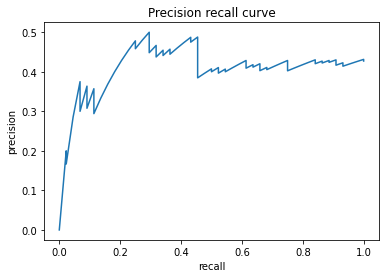

In [22]:

prec = np.array(plist)
rec = np.array(rlist)

plt.plot(rec,prec)
plt.title("Precision recall curve")
plt.xlabel('recall')  
plt.ylabel('precision')  

plt.show()

# Q3.3